# setup, define functions

In [1]:
# make my graphs not pixelated af
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from gensim.models import KeyedVectors

In [3]:
model_dir = '/srv/data/judel/models/'


# copied from tms/word2vec.py
def load_model(model_path):
    return KeyedVectors.load(model_path, mmap='r')

In [4]:
def knn_ccla(knn_ddict_c1, knn_ddict_c2):
    """
    compute CCLA score with respect to the k nearest neighbors between contexts C1, C2
    :param knn_ddict_c1: a defaultdict(float) of k nearest neighbors in C1,
        with key: word -> val: cosine similarity
    :param knn_ddict_c2: same as knn_ddict_c1, but for C2
    :return: CCLA score
    """
    numerator = 0
    for word, similarity in knn_ddict_c1.items():
        numerator += similarity * knn_ddict_c2[word]
    denominator = np.linalg.norm(list(knn_ddict_c1.values())) * np.linalg.norm(list(knn_ddict_c2.values()))
    if denominator > 0:
        return numerator / denominator
    else:
        return 0

In [5]:
# test block (safe to delete)

assert knn_ccla(
    defaultdict(float, {'grapes': 0.47, 'sweet': 0.4, 'meek': 0.38}),
    defaultdict(float, {'bitter': 0.41, 'tart': 0.39, 'sweet': 0.37})
).round(3) == 0.302

# run CCLA experiment

In [6]:
def get_knn_ddicts(word, begin_year, end_year, k):
    """
    compute kNN word similarities by decade
    :param word: the word we're examining over time
    :param begin_year: the first year (must be multiple of 10 between 1790 and 2000)
    :param end_year: the final year (must be multiple of 10 between 1790 and 2000)
    :param k: the number of neighbors to look at
    :return: kNN defaultdicts for use in knn_ccla()
    """
    knn_ddicts = dict()
    for decade in range(begin_year, end_year+1, 10):
        model = load_model(f'{model_dir}{decade}_{decade+9}.w2v')
        decade_ddict = defaultdict(float)
        if model.has_index_for(word):
            for neighbor, similarity in model.most_similar(word, topn=k):
                decade_ddict[neighbor] = similarity
        knn_ddicts[decade] = decade_ddict
    return knn_ddicts

In [13]:
# see CCLA results by decade (first chunk)

start_year = 1790
end_year = 1890
k = 11

juv_knn_ddicts = get_knn_ddicts('juvenile', start_year, end_year, k)
del_knn_ddicts = get_knn_ddicts('delinquency', start_year, end_year, k)

x_vals = list()
y_vals_juv = list()
y_vals_del = list()
for decade in range(start_year, end_year-1, 10):
    x_vals.append(decade+5)
    juv_knn_ddict_c1 = juv_knn_ddicts[decade]
    juv_knn_ddict_c2 = juv_knn_ddicts[decade+10]
    y_vals_juv.append(knn_ccla(juv_knn_ddict_c1, juv_knn_ddict_c2))
    del_knn_ddict_c1 = del_knn_ddicts[decade]
    del_knn_ddict_c2 = del_knn_ddicts[decade+10]
    y_vals_del.append(knn_ccla(del_knn_ddict_c1, del_knn_ddict_c2))

In [14]:
# see CCLA results by decade (second chunk)

start_year = 1910
end_year = 2000

juv_knn_ddicts = get_knn_ddicts('juvenile', start_year, end_year, k)
del_knn_ddicts = get_knn_ddicts('delinquency', start_year, end_year, k)

for decade in range(start_year, end_year-1, 10):
    x_vals.append(decade+5)
    juv_knn_ddict_c1 = juv_knn_ddicts[decade]
    juv_knn_ddict_c2 = juv_knn_ddicts[decade+10]
    y_vals_juv.append(knn_ccla(juv_knn_ddict_c1, juv_knn_ddict_c2))
    del_knn_ddict_c1 = del_knn_ddicts[decade]
    del_knn_ddict_c2 = del_knn_ddicts[decade+10]
    y_vals_del.append(knn_ccla(del_knn_ddict_c1, del_knn_ddict_c2))

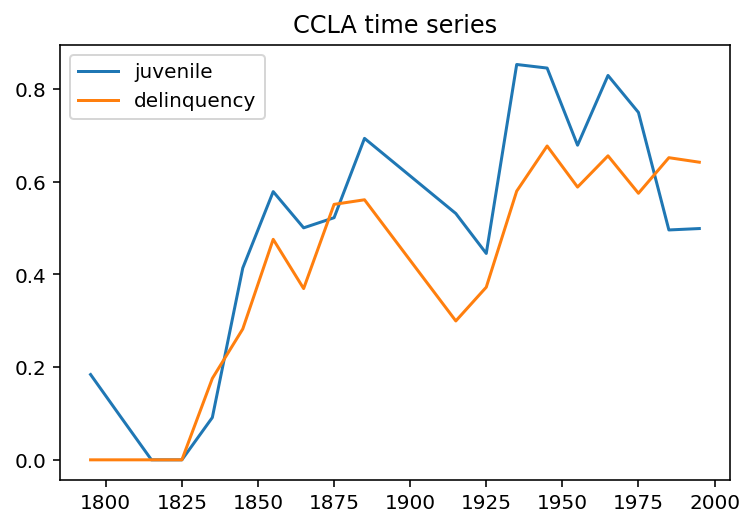

In [15]:
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals_juv)
ax.plot(x_vals, y_vals_del)
ax.legend(['juvenile', 'delinquency'])
ax.set_title('CCLA time series')
fig.show()

_(Note that higher CCLA is more similar.)_

It looks like the meaning stabilizes over time, with the exception of the period from 1880-1920, when both terms appear to undergo significant meaning shift, then re-stabilize afterwards. However, it may be that this is largely an artifact of the term coming into more frequent use, and not an unbiased indicator of meaning change over time. Let's try another example below.

In [16]:
# see CCLA results by decade (first chunk)

start_year = 1790
end_year = 1890
k = 11

juv_knn_ddicts = get_knn_ddicts('scoundrel', start_year, end_year, k)
del_knn_ddicts = get_knn_ddicts('digital', start_year, end_year, k)

x_vals = list()
y_vals_juv = list()
y_vals_del = list()
for decade in range(start_year, end_year-1, 10):
    x_vals.append(decade+5)
    juv_knn_ddict_c1 = juv_knn_ddicts[decade]
    juv_knn_ddict_c2 = juv_knn_ddicts[decade+10]
    y_vals_juv.append(knn_ccla(juv_knn_ddict_c1, juv_knn_ddict_c2))
    del_knn_ddict_c1 = del_knn_ddicts[decade]
    del_knn_ddict_c2 = del_knn_ddicts[decade+10]
    y_vals_del.append(knn_ccla(del_knn_ddict_c1, del_knn_ddict_c2))

In [17]:
# see CCLA results by decade (second chunk)

start_year = 1910
end_year = 2000

juv_knn_ddicts = get_knn_ddicts('scoundrel', start_year, end_year, k)
del_knn_ddicts = get_knn_ddicts('digital', start_year, end_year, k)

for decade in range(start_year, end_year-1, 10):
    x_vals.append(decade+5)
    juv_knn_ddict_c1 = juv_knn_ddicts[decade]
    juv_knn_ddict_c2 = juv_knn_ddicts[decade+10]
    y_vals_juv.append(knn_ccla(juv_knn_ddict_c1, juv_knn_ddict_c2))
    del_knn_ddict_c1 = del_knn_ddicts[decade]
    del_knn_ddict_c2 = del_knn_ddicts[decade+10]
    y_vals_del.append(knn_ccla(del_knn_ddict_c1, del_knn_ddict_c2))

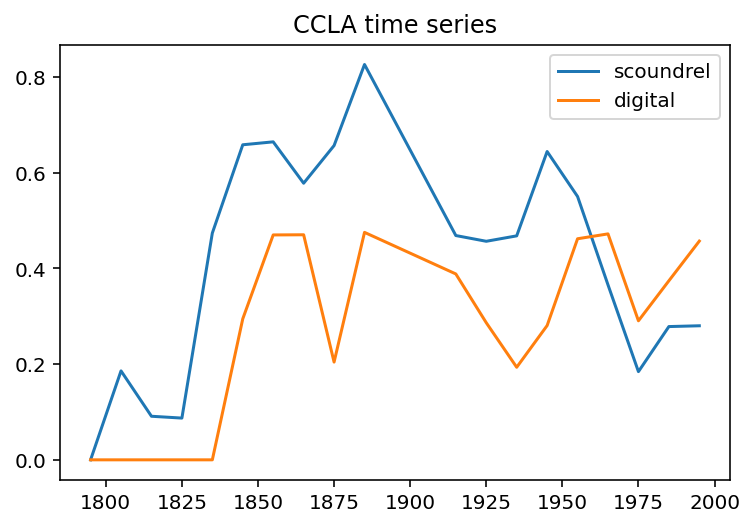

In [18]:
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals_juv)
ax.plot(x_vals, y_vals_del)
ax.legend(['scoundrel', 'digital'])
ax.set_title('CCLA time series')
fig.show()

Here's an example of two words whose meanings I suspect changed a lot over this period -- one which is more modern ("digital"), and one which is more archaic ("scoundrel"). We still see a sharp increase from the start of the analysis to the first few decades, but the patterns of both terms over time do not mirror each other nearly as well.